# Homework 8 writeup solutions

## Name: Karsten Onarheim

## Problem 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

## Load in the image of Olive's perfect paws.

In [2]:
A = cv2.imread('olive.jpg', 0) # Remove the 0 if you want 
                               # to see the color version!

U, S, Vt = np.linalg.svd(A, full_matrices=False) # Vt = V transpose
r = 226
# Remember that the singular values are ranked by default!
total_energy = np.sum(S)
S_mat = np.diag(S)
rank_1 = (U[:, 0:1]@S_mat[0:1, 0:1])@Vt[0:1, :]
rank_10 = (U[:, 0:10]@S_mat[0:10, 0:10])@Vt[0:10, :]
rank_226 = (U[:, 0:226]@S_mat[0:226, 0:226])@Vt[0:226, :]

## Part (a) - 2x2 grid

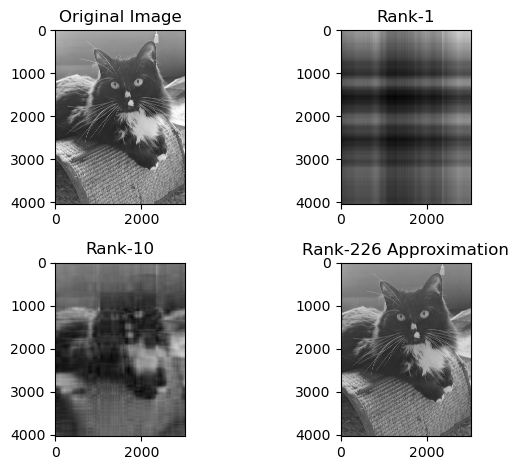

In [3]:
fig, ax = plt.subplots(2, 2)

ax[0,0].imshow(A, cmap='gray')
ax[0,0].set_title('Original Image')

ax[0,1].imshow(rank_1, cmap='gray')
ax[0,1].set_title('Rank-1')

ax[1,0].imshow(rank_10, cmap='gray')
ax[1,0].set_title('Rank-10')

ax[1,1].imshow(rank_226, cmap='gray')
ax[1,1].set_title('Rank-226 Approximation')

fig.tight_layout()

# You need to fill in the other parts.

## Part b - Calculate the total number of pixels for the image and its approximation.

In [4]:
numPixels = A.shape[0]*A.shape[1]
print("Number of Pixels =", numPixels)

numValuesRank1 = A.shape[0] + A.shape[1] + 1
numValuesRankr = numValuesRank1 * r
print("Number of Values in Rank 226 =", numValuesRankr)

print("Ratio of Pixels per Value =", numPixels/numValuesRankr)

print("Ratio of Original (Rank 3024) Number of Values to Rank 226 Number of")
print(" Values =", 3024/226)

Number of Pixels = 12192768
Number of Values in Rank 226 = 1594882
Ratio of Pixels per Value = 7.644934233379021
Ratio of Original (Rank 3024) Number of Values to Rank 226 Number of
 Values = 13.380530973451327


## Part c - Discuss

As is printed above, there are 12192768 pixels in the actual image and 1594882 values used for the Rank 226 approximation of the image that yields 75% of the energy. This makes the ratio of pixels to values in the Rank 226 approximation 7.644934233379021. The ratio of actual values used in the original image, or the Rank 3024 image, to values used in the Rank 226 approximation is 3024/226 or 13.380530973451327. Either way, we can see that the efficiency of storing the original image is very low. The image that stores 75% of the energy (Rank 226) uses less that 1/7 the storage (not taking into account encryption to save storage). In other words, perfecting the last 25% of the image takes more than 6 times as much storage as getting just the first 75%, making the last 25% very inefficient.